# Personal Information
Name: **Jeremy Palmerio**

StudentID: **15788792**

Email: [**jeremy.palmerio@student.uva.nl**](jeremy.palmeriol@student.uva.nl)

Submitted on: **23.03.2025**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**


The data for this project come from the MYRIAD project funded by the European Union Horizon 2020 project. Topological, environmental, geoloical and hyrdological features are derived from satelite images. These images have been feature engineered to produce the data for this project. 

The following signals will be used: 
- **accuflux** : Represents the accumulated water flux derived from topographic gradients.
- **aspect** : Indicates the compass direction that a slope faces. 
- **coastlines** : Measures the distance to the nearest coastline. 
- **curvature** : Describes the curvature profile of the terrain, showing how the slope changes across the landscape. 
- **elevation** : The height above sea level.
- **fire_weather** A composite index that reflects weather conditions favorable for wildfires.
- **GEM** : Global Earthquake Model or related seismic hazard data.
- **GLIM** : Global Lithological Map, providing data on rock and soil types. 
- **heatwave** : Captures the occurrence or intensity of extreme heat events. 
- **HWSD** : The Harmonized World Soil Database, which offers detailed information on soil types and properties.
- **landcover** : Categorical data representing land use (e.g., urban, agricultural, forested).
- **NDVI** : The Normalized Difference Vegetation Index, an indicator of vegetation health and density.
- **pga** : Peak Ground Acceleration, a measure of the maximum ground shaking during an earthquake.
- **precipitation_daily** : Daily measurements of rainfall.
- **rivers** : Distance to river.
- **slope** : The gradient or steepness of the terrain.
- **strahler** : Refers to the Strahler stream order, a method of classifying the hierarchy of streams in a drainage network. 
- **temperature_daily**: The average daily temperature.
- **wind_direction_daily**: The predominant wind direction on a daily basis.
- **wind_speed_daily**: The average daily wind speed.


The goal of this thesis is two-fold: 
1. Single-hazard suscpetibility maps will be generated from the data above for:
    - Extreme wind <font color='green'>(collected)</font>
    - Droughts <font color='green'>(collected)</font>
    - Heatwaves <font color='green'>(collected)</font>
    - Wildfires <font color='green'>(collected)</font>
    - Floods <font color='red'>(not collected)</font>
    - Landslides <font color='red'>(not collected)</font>
    - Tsunamis <font color='red'>(not collected)</font>
    - Earthquakes <font color='red'>(not collected)</font>
    - Volcanos <font color='red'>(not collected)</font>
2. A multi-hazard susceptibility map will be generated from the single-hazard maps. 

Most of the single-hazard validation data (historic occurences) is collected, however some hazards are still in the process of being collected/engineered. See list above for breakdown.

Finally these are the predictors used for each single-hazard:
1. **Extreme wind**:
    - wind_speed_daily (already mapped as '<font color='yellow'>**extreme_wind**</font>' signal)
2. **Droughts**:
    - SPEI (already mapped as '<font color='yellow'>**drought**</font>' signal)
3. **Heatwave**:
    - temperature_daily (already mapped as '<font color='yellow'>**heatwave**</font>' signal)
4. **Wildifre**: 
    - temperature_daily, NDVI, landcover, elevation, wind_speed, fire_weather, soil_moisture(root or surface) (<font color='yellow'>CNN</font>)
5. **Floods**:
    - slope, curvature, aspect, accuflux, NDVI, landcover, precipitation_daily, GLIM, rivers, HWSD, pga (<font color='yellow'>CNN</font>)
6. **Landslides**:
    - slope, curvature, aspect, accuflux, NDVI, landcover, GLIM, GEM, HWSD (<font color='yellow'>CNN</font>)
7. **Tsunamis**:
    - elevation, coastline, GEM (<font color='yellow'>CNN</font>)
8. **Earthquakes**:
    - GEM, pga (<font color='yellow'></font>)
9. **Volcanos**: 
    - (still unsure whether to include this in model for Europe)


# Data Description

The input signals are given in numpy format, and consist of a bounded box from approximately 25'W to 46'E and  27'N to 73'N which contains all of continental Europe, parts of North Affrica and the near Middle East. All files are of the same shape (16560, 25560), where each cell in the grid corresponds to a 300m x 300m area on the surface. Because fo the extremely large size of the files (~2-3Gb), some computation has been done on Snellius, but to make local work easier, the files have been down-sampled by a factor of 100x. The new down-sampled arrays are used to investigate distribution properpties, correlations between signals and more. 



In [1]:
# Imports
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import Normalize
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import kde, gaussian_kde
import sys
import geopandas as gpd
import seaborn as sns
import pandas as pd
import rasterio
from rasterio.enums import Resampling

plt.style.use('bauhaus_light')

In [9]:
## Getting bounding box shape of inputs 
!gdalinfo windy_days_Europe.tif

Driver: GTiff/GeoTIFF
Files: windy_days_Europe.tif
Size is 25560, 16560
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],


In [10]:
# Run  downsampling script on Snellius to obtain workable data
# !sbatch downsample.py

In [11]:
# The downsampled data does not correspond to map anymore, it can only be used to explore the data
# Comparing the original and downsampled data

temperature = np.load(
    'Input/Europe/npy_arrays/masked_temperature_daily_Europe.npy'
    ) # original data
temperature_downsampled = np.load(
    'Input/Europe/downsampled_arrays/masked_temperature_daily_Europe_downsampled.npy'
    ) # downsampled data

print(temperature.shape, temperature_downsampled.shape)


(16560, 25560) (2103439,)


# Plotting Individual Input maps 

In [2]:

def plot_singles(npy_files, npy_names, debug_nans=False):
    """
    Plots the data from npy files on a map with the correct coordinates.

    Parameters:
    npy_files (list): List of file paths to the npy files.
    npy_names (list): List of names corresponding to the npy files.
    extents (list): List of extents (geographical bounds) for each npy file.

    Returns:
    None
    """
    for i, npy_file in enumerate(npy_files):
        name = npy_names[i]
        extent = (-25.0001389, 45.9998611,  27.0001389, 73.0001389)

        # Create a subplot with PlateCarree projection
        fig, axs = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})

        # Normalize the colorbar to the values between 0 and 1
        # norm = Normalize(vmin=0, vmax=1)

        print(npy_names[i])
        # Read data
        npy_data = np.load(npy_file)
        print("File loaded")

        if debug_nans:
            # set everything to 0 except for NaNs
            npy_data[~np.isnan(npy_data)] = 0
            npy_data[np.isnan(npy_data)] = 1


        # if npy_names[i] == 'Curvature':
        #     npy_data[npy_data == -9999] = np.nan
        #     npy_data[npy_data < 0] = 0
        #     npy_data[npy_data > 0] = 1
        # elif npy_names[i] == 'Accumulated Water Flux':
        #     npy_data[npy_data == -9999] = np.nan
        #     npy_data[npy_data < 3] = 0
        #     npy_data[npy_data >= 3] = 1
        # elif npy_names[i] == 'Faultlines':
        #     npy_data[npy_data == -9999] = np.nan
        #     # npy_data[npy_data < 100] = 0
        #     npy_data[npy_data >= 10] = 10
        # elif npy_names[i] == 'Rivers':
        #     npy_data[npy_data == -9999] = np.nan
        #     npy_data[npy_data >= 1] = 1
        # npy_data = np.ma.masked_where(npy_data == 0, npy_data)

        # Normalize the colorbar to the range [0, 1] (adjust as needed)
        # norm = Normalize(vmin=0, vmax=np.max(npy_data))

        # Plot the data on the subplot grid
        im = axs.contourf(np.flipud(npy_data), cmap='viridis', extent=extent)
 
        # Set title for each subplot
        axs.set_title(f'European {name} Map', fontsize=16)

        # Set longitude tick labels
        axs.set_xticks(np.arange(extent[0], extent[1] + 1, 5), crs=ccrs.PlateCarree())
        axs.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}°'))

        # Set latitude tick labels
        axs.set_yticks(np.arange(extent[2], extent[3] + 1, 5), crs=ccrs.PlateCarree())
        axs.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}°'))

        axs.set_xlabel('Longitude')
        axs.set_ylabel('Latitude')

        # Add coastlines and country borders
        axs.add_feature(cfeature.COASTLINE, linewidth=0.1, edgecolor='black')
        axs.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.1)
        axs.add_feature(cfeature.LAND, facecolor='#FFEB3B', alpha=0.1)
        axs.add_feature(cfeature.OCEAN, facecolor='#A6CAE0')



        # crop the map to the extent
        croped_extent = (-5, 10, 40, 52)
        axs.set_extent(croped_extent, crs=ccrs.PlateCarree())

        # Add a colorbar for all subplots
        cbar = fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1)
        cbar.set_label(f'{name}', fontsize=16)
        cbar.ax.tick_params(labelsize=12) 

        # # Set the colorbar ticks and labels
        # cbar.set_ticks(np.arange(0, 1.1, 0.1))  # Ticks from 0 to 1 with 0.1 increments
        # cbar.set_ticklabels([f'{i:.1f}' for i in np.arange(0, 1.1, 0.1)])

        # Adjust layout for better spacing
        plt.tight_layout()
        # plt.subplots_adjust(right=0.85, wspace=0.1)


        # Save the plot
        if not debug_nans:
            plt.savefig(f'EDA/high_res_maps/{npy_names[i]}_signal.png', dpi=5000, bbox_inches='tight')

            


Landcover
File loaded


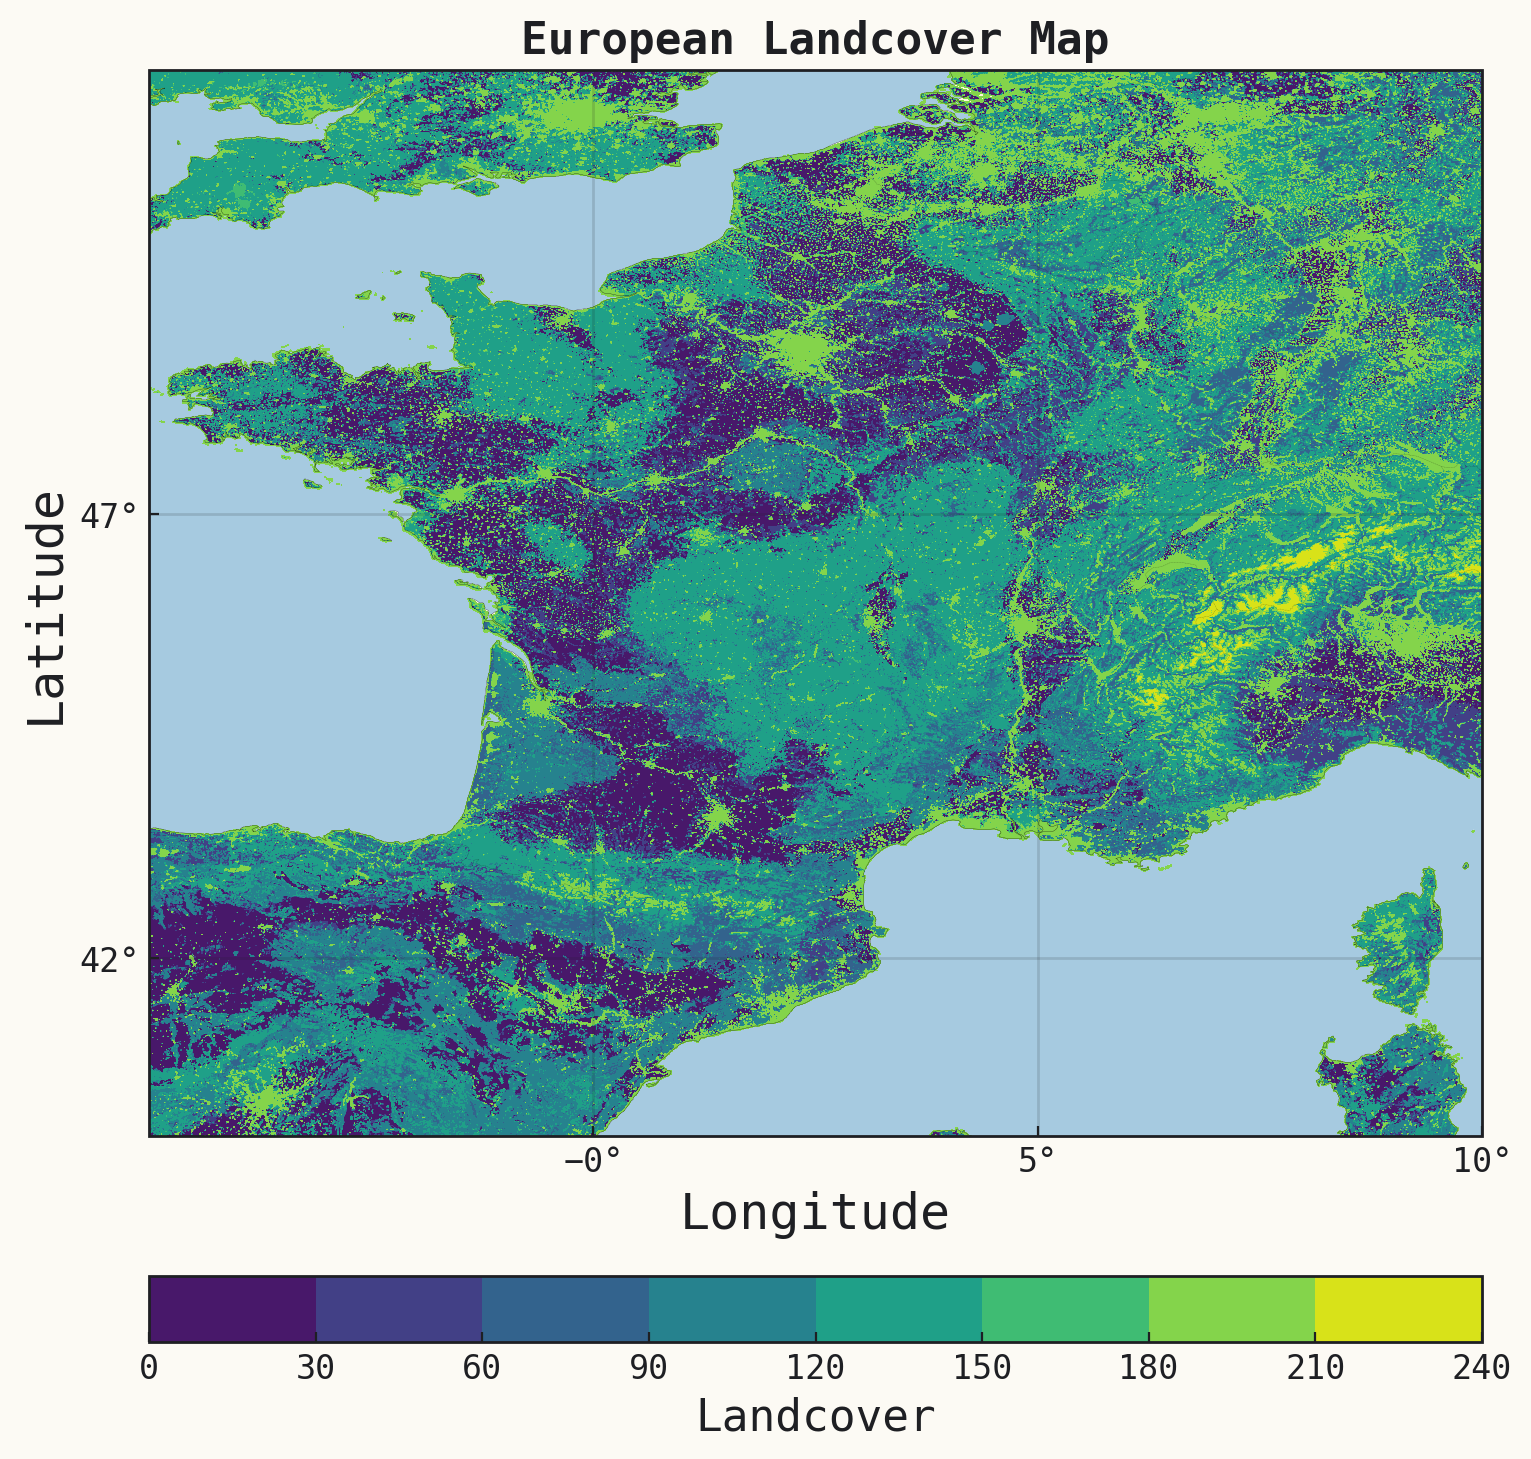

: 

In [ ]:
# Example Signal Plot as map (from full numpy array)
npy_files = ["Input/Europe/npy_arrays/masked_landcover_Europe_flat.npy"]
npy_names = ['Landcover']

plot_singles(npy_files, npy_names)

# Exploring signal distributions 

In [2]:
npy_data = [
("EL", "Elevation", "Input/Europe/downsampled_arrays/masked_elevation_Europe_downsampled.npy"),
("SL", "Slope", "Input/Europe/downsampled_arrays/masked_slope_Europe_downsampled.npy"),
("CU", "Curvature", "Input/Europe/downsampled_arrays/masked_curvature_Europe_downsampled.npy"),
("AS", "Aspect", "Input/Europe/downsampled_arrays/masked_aspect_Europe_downsampled.npy"),
("AF", "Accuflux", "Input/Europe/downsampled_arrays/masked_accuflux_Europe_downsampled.npy"),
("RI", "Rivers", "Input/Europe/downsampled_arrays/masked_rivers_Europe_downsampled.npy"),
("FA", "GEM", "Input/Europe/downsampled_arrays/masked_GEM_Europe_downsampled.npy"),
("LC", "Landcover", "Input/Europe/downsampled_arrays/masked_landcover_Europe_flat_downsampled.npy"),
("SO", "HWSD", "Input/Europe/downsampled_arrays/masked_HWSD_Europe_downsampled.npy"),
("LI", "GLIM", "Input/Europe/downsampled_arrays/masked_GLIM_Europe_downsampled.npy"),
("NV", "NDVI", "Input/Europe/downsampled_arrays/masked_NDVI_Europe_flat_downsampled.npy"),
("TM", "Temperature", "Input/Europe/downsampled_arrays/masked_temperature_daily_Europe_downsampled.npy"),
("PR", "Precipitation", "Input/Europe/downsampled_arrays/masked_precipitation_daily_Europe_downsampled.npy"),
("CL", "Coastlines", "Input/Europe/downsampled_arrays/masked_coastlines_Europe_downsampled.npy"),
("FW", "Fire Weather", "Input/Europe/downsampled_arrays/masked_fire_weather_Europe_downsampled.npy"),
("SMR", "Root Soil Moisture", "Input/Europe/downsampled_arrays/masked_soil_moisture_root_Europe_downsampled.npy"),
("SMS", "Surface Soil Moisture", "Input/Europe/downsampled_arrays/masked_soil_moisture_surface_Europe_downsampled.npy"),
("ST", "Strahler", "Input/Europe/downsampled_arrays/masked_strahler_Europe_downsampled.npy"),
("WD", "Wind Direction", "Input/Europe/downsampled_arrays/masked_wind_direction_daily_Europe_downsampled.npy"),
("WS", "Wind Speed", "Input/Europe/downsampled_arrays/masked_wind_speed_daily_Europe_downsampled.npy"),
]
    # "Input/Europe/downsampled_arrays/masked_pga_Europe_downsampled.npy",
    # "Input/Europe/downsampled_arrays/masked_heatwave_Europe_downsampled.npy",
    # "Input/Europe/downsampled_arrays/masked_drought_Europe_downsampled.npy",
    # "Input/Europe/downsampled_arrays/masked_extreme_wind_Europe_downsampled.npy",
    # "Input/Europe/downsampled_arrays/masked_multi_hazard_Europe_downsampled.npy",
    # "Input/Europe/downsampled_arrays/masked_volcano_Europe_downsampled.npy",
    # "Input/Europe/downsampled_arrays/masked_wildfire_Europe_downsampled.npy",
    # floods
    # landslides
    # tsunamis
    
npy_short = [short for short, _, _ in npy_data]   
npy_names = [name for _, name, _ in npy_data]
npy_files = [file for _, _, file in npy_data]


In [3]:
def get_info(file, name):
    data = np.load(file)
    shape = data.shape
    range = [np.min(data), np.max(data)]
    unique = np.unique(data)
    nans = np.count_nonzero(np.isnan(data))
    non_zero = np.count_nonzero(data)
    non_zero_ratio = (np.count_nonzero(data) / data.size)
    return [name, shape, range, unique, nans, non_zero, non_zero_ratio]

In [4]:
signal_info = pd.DataFrame(columns=['Name', 'Shape', 'Range', 'Unique',"NaNs", 'Non-zero', 'Non-zero ratio'])
for i in range(len(npy_files)):
    signal_info.loc[i] = get_info(npy_files[i], npy_names[i])

signal_info.head(30)

,Name,Shape,Range,Unique,NaNs,Non-zero,Non-zero ratio
0,Elevation,"(2103439,)","[0.0, 5135.9155]","[0.0, 1.7499999e-06, 2.9999999e-06, 3.25e-06, ...",0,2085321,0.991386
1,Slope,"(2103439,)","[0.0, 158057.39]","[0.0, 0.00041761601, 0.0004772971, 0.000495, 0...",0,1995286,0.948583
2,Curvature,"(2103439,)","[0.0, 10670433000.0]","[0.0, 35.64, 51.84, 55.08, 61.560093, 116.6399...",0,907966,0.431658
3,Aspect,"(2103439,)","[0.0, 359.99997]","[0.0, 6.090471e-05, 0.00019846165, 0.000309870...",0,2102981,0.999782
4,Accuflux,"(2103439,)","[0.0, 2147207600.0]","[0.0, 1.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,...",0,2103029,0.999805
5,Rivers,"(2103439,)","[0.0, 13145.44107285868]","[0.0, 1.0, 1.4142135623730951, 2.0, 2.23606797...",0,1367697,0.650219
6,GEM,"(2103439,)","[0.0, 9434.996396395709]","[0.0, 1.0, 1.4142135623730951, 2.0, 2.23606797...",0,2100841,0.998765
7,Landcover,"(2103439,)","[10.0, 220.0]","[10.0, 11.0, 12.0, 20.0, 30.0, 40.0, 50.0, 60....",0,2103439,1.000000
8,HWSD,"(2103439,)","[0.0, 36.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",0,2095185,0.996076
9,GLIM,"(2103439,)","[0.0, 16.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",0,2085176,0.991318


In [5]:
def plot_distribution(file, name):
    # whisker plot for the data
    fig, ax = plt.subplots(2, 1, figsize=(8, 5), gridspec_kw={'height_ratios': [3, 1]})

    data = np.load(file)
    data = data[~np.isnan(data)]

    sns.boxplot(data, ax=ax[1], orient='h')
    sns.histplot(data, ax=ax[0], label='boxplot')

    fig.suptitle(f'{name} Distribution')
    
    plt.savefig(f'Input/Europe/distributions/{name}_distribution.png', dpi=500)
    plt.show()
   

![image](distributions/Coastlines_distribution.png)

# Understanding Missing Values

Root Soil Moisture
File loaded


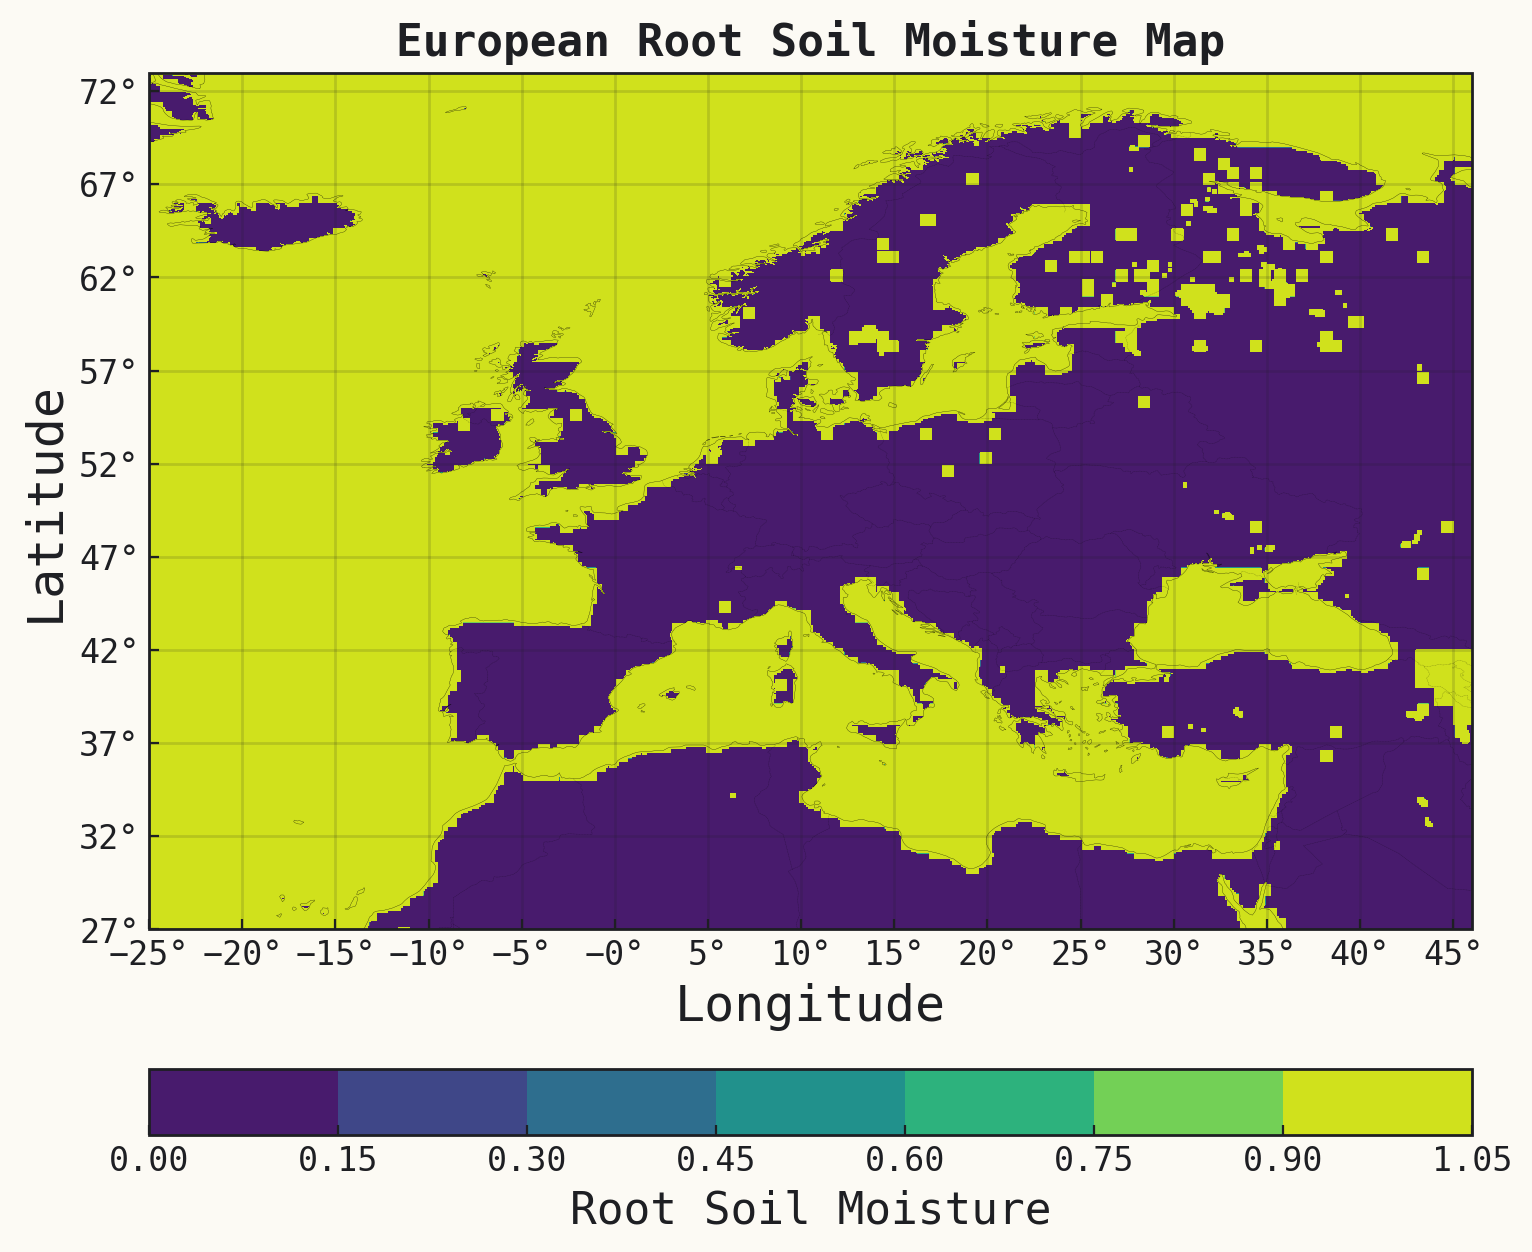

In [3]:
# Missing values in NDVI, Fire Weather, Root Soil Moisture, Surface Soil Moisture


plot_singles(["Input/Europe/npy_arrays/masked_soil_moisture_root_Europe.npy"], ["Root Soil Moisture"], debug_nans=True)


# Plot correlation matrix

In [ ]:
# Plot correlation heatmap

def corr_heatmap(npy_files, npy_names):
    """
    Plots a heatmap of the correlation matrix between the input variables.  
    Parameters:
    npy_files (list): List of file paths to the npy files.
    npy_names (list): List of names corresponding to the npy files.

    Returns:
    None
    """
    # Load the elevation map
    elevation_map = np.load("Input/Europe/npy_arrays/masked_elevation_Europe.npy")

    # Load other raster maps and filter out cells with elevation greater than -9999
    data = []
    for file in npy_files:
        downsampled_data = np.load(file)
        data.append(downsampled_data)

    # np.save('Output/Correlation_variables.npy', data)
    # data = np.load('Output/Correlation_variables.npy')

    # Combine the data into a DataFrame
    df = pd.DataFrame(data=np.vstack(data).T, columns=npy_names)
    # df.to_excel("Output/Correlation_variables")
    # sys.exit(0)

    # Calculate correlation matrix
    correlation_matrix = df.corr()

    # Sample df
    # sampled_df = df.sample(n=1000, random_state=42)
    sampled_df = df.copy()

    # Create figure and axes
    fig, axes = plt.subplots(nrows=len(npy_names), ncols=len(npy_names), figsize=(16, 14))

    # Create scatter plots for lower triangle
    for i in range(len(npy_names)):
        for j in range(len(npy_names)):
            if i > j:
                print(npy_names[i], npy_names[j])
            
    
                axes[i, j].scatter(sampled_df[npy_names[j]], sampled_df[npy_names[i]], alpha=0.7, color='skyblue')
                axes[i, j].set_xticks([])
                axes[i, j].set_yticks([])

                if j == 0 and i == len(npy_names) - 1:
                    axes[i, j].set_ylabel(npy_names[i])
                    axes[i, j].set_xlabel(npy_names[j])
                elif j == 0:
                    axes[i, j].set_ylabel(npy_names[i])
                elif i == len(npy_names) - 1:
                    axes[i, j].set_xlabel(npy_names[j])

            elif i == j:
                print(npy_names[i])
                # Gaussian KDE self
                sns.kdeplot(sampled_df[npy_names[i]], ax=axes[i, j], color='k', fill=True, alpha=0.3)
                # axes[i, j].scatter(sampled_df[npy_names[j]], sampled_df[npy_names[i]], alpha=0.7, color='skyblue')
                # axes[i, j].axis('off')
                axes[i, j].set_xticks([])
                axes[i, j].set_yticks([])
            
                if j == 0:
                    axes[i, j].set_ylabel(npy_names[i])
                    axes[i, j].xaxis.tick_top()
                    axes[i, j].xaxis.set_label_position("top")
                    axes[i, j].set_xlabel(npy_names[j])
                elif i == len(npy_names) - 1:
                    axes[i, j].yaxis.tick_right()
                    axes[i, j].yaxis.set_label_position("right")
                    axes[i, j].set_ylabel(npy_names[i])
                    axes[i, j].set_xlabel(npy_names[j])
                else:
                    axes[i, j].set_ylabel('')
                    axes[i, j].set_xlabel('')

    # Show the correlation matrix in the upper triangle
    for i in range(len(npy_names)):
        for j in range(i+1, len(npy_names)):
            print(f'Plotting correlation value for {npy_names[i]} and {npy_names[j]}')
            # Determine face color based on correlation value
            corr_value = correlation_matrix.iloc[i, j]

            # Plot heatmap with background shading
            axes[i, j].imshow([[corr_value]], cmap='RdBu_r', aspect='auto', extent=(0, 1, 0, 1), alpha=0.5, vmin=-1, vmax=1)
            axes[i, j].text(0.5, 0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]), ha='center', va='center', fontsize=12)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            if i == 0 and j == len(npy_names) - 1:
                axes[i, j].xaxis.tick_top()
                axes[i, j].xaxis.set_label_position("top")
                axes[i, j].set_xlabel(npy_names[j])
                axes[i, j].yaxis.tick_right()
                axes[i, j].yaxis.set_label_position("right")
                axes[i, j].set_ylabel(npy_names[j])
            elif i == 0:
                axes[i, j].xaxis.tick_top()
                axes[i, j].xaxis.set_label_position("top")
                axes[i, j].set_xlabel(npy_names[j])
                axes[i, j].set_ylabel('')
            elif j == len(npy_names) - 1:
                axes[i, j].yaxis.tick_right()
                axes[i, j].yaxis.set_label_position("right")
                axes[i, j].set_ylabel(npy_names[i])
                axes[i, j].set_xlabel('')
            else:
                axes[i, j].set_xlabel('')
                axes[i, j].set_ylabel('')

    plt.tight_layout()
    plt.savefig(f'Output/Europe/correlation_heatmap.png', dpi=500)
    plt.show()

In [ ]:
corr_heatmap(npy_files=npy_files, npy_names=npy_names)


![image](correlation_heatmap.png)